# Training KNN Model 

In [1]:
import glob
import librosa
import librosa.display
import numpy as np
import _pickle as pickle
from sklearn import svm
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [27]:
train_fea = 'train_fea.npy'
train_lab = 'train_lab.npy'
val_fea = 'val_fea.npy'
val_lab = 'val_lab.npy'
path_to_npy = 'D:/Project_TH_2/data'

In [18]:
tr_features = np.load(f'{path_to_npy}/{train_fea}', allow_pickle=True)
tr_labels = np.load(f'{path_to_npy}/{train_lab}', allow_pickle=True)

X=tr_features.astype(int)
y=tr_labels.astype(str)

neigh = KNeighborsClassifier(
    algorithm= 'auto', 
    n_neighbors= 7, 
    p= 1, 
    weights= 'uniform'
)

neigh = neigh.fit(X, y)

filename = 'D:/Project_TH_2/ModelKNN.sav'

pickle.dump(neigh, open(filename, 'wb'), protocol=2)

print('Model Saved..')
print('Score:', neigh.score(X=tr_features.astype(int), y=tr_labels.astype(str)))

Model Saved..
Score: 0.7265263157894737


In [23]:
tr_features.shape

(19000, 193)

In [5]:
tr_labels.shape

(19000,)

In [7]:
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

[learning_curve] Training set sizes: [ 1520  4940  8360 11780 15200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.1min finished


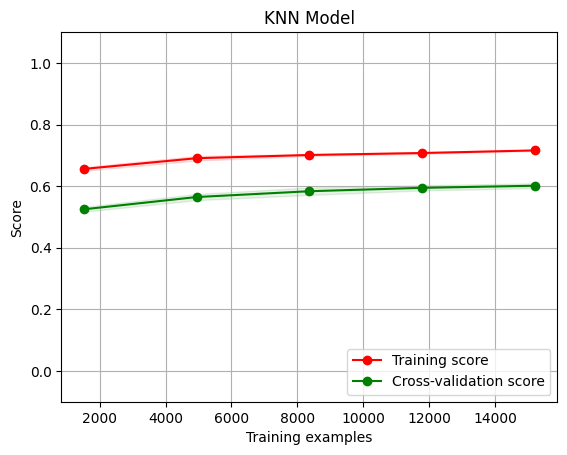

In [24]:
# Learning curve plotting
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)
train_sizes, train_scores, test_scores = learning_curve(neigh, X, y, n_jobs=-1, cv=kfold,
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNN Model")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
line_up = plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
line_down = plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylim(-.1, 1.1)
plt.legend(loc="best")
plt.legend(loc="lower right")
plt.show()

# Testing the Model 

In [25]:
import glob
import librosa
import librosa.display
import numpy as np
import _pickle as pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [28]:
ts_features = np.load(f'{path_to_npy}/{val_fea}', allow_pickle=True)
ts_labels = np.load(f'{path_to_npy}/{val_lab}', allow_pickle=True)

# Load saved model from file
model = pickle.load(open(filename, 'rb'))

# Predict the emotion class
prediction = model.predict(ts_features)

# True labels
test_true = ts_labels

# List to store prediction
test_predicted = []

# Iterate over model prediction and store it into list
for i, val in enumerate(prediction):
    test_predicted.append(val)


# Accuracy score of model
print('Accuracy Score:', accuracy_score(test_true, test_predicted))

# Number of corrected prediction
print('Number of correct prediction using KNN:', accuracy_score(test_true, test_predicted, normalize=False), 'out of', len(ts_labels))

Accuracy Score: 0.6067368421052631
Number of correct prediction using KNN: 1441.0 out of 2375


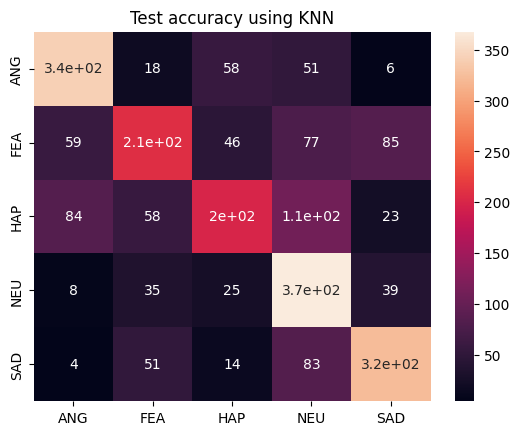

In [29]:
# Plotting confusion matrix
matrix = confusion_matrix(test_true, test_predicted)
classes = list(set(ts_labels))
classes.sort()
df = pd.DataFrame(matrix, columns=classes, index=classes)
plt.figure()
plt.title('Test accuracy using KNN')
sn.heatmap(df, annot=True)

plt.show()